# Overview of Stochastic Differential Equations 

We plan to explore some common Stochastic Differential Equations that arise in finance. The analytical solution to our SDE will be a random process. We seek analytical solutions when possible, and we seek to describe the distributions of these random processes. In each case, we will do simulations to verify our analytical results. In many cases, analytical solutions will not be possible, so we must be very comfortable with constucting simulations to find numerical results.

## Arithmetic Brownian Motion

### Analytical Solution

Arithmetic Brownian Motion is described by the following SDE:

$$ dX(t) = \mu dt + \sigma dB(t) $$

This is a very simple SDE to solve analytically,

$$ 
\begin{align*} 
X(t) &= X(0) + \int_0^t \mu dt + \int_0^t \sigma dB(u) \\
&= X(0) + \mu t + \sigma B(t)
\end{align*}
$$ 

### Distribution

First, we calculate the mean and variance. 

$$
\begin{align*}
E(X(t)) &= X(0) + \mu t \\
Var(X(t)) &= \sigma^2 t \\
\end{align*}
$$

First thing we notice is that our solution is a linear combination of normal distributions, and therefore must be normally distributed. Therefore,

$$X(t) \sim N[X(0) + \mu t, \sigma^2 t]$$

### Simulations




The expected mean is 0.07, and the actual mean is 0.07793519112778458
The expected variance is 0.04000000000000001, and the actual variance is 0.03962456341886865


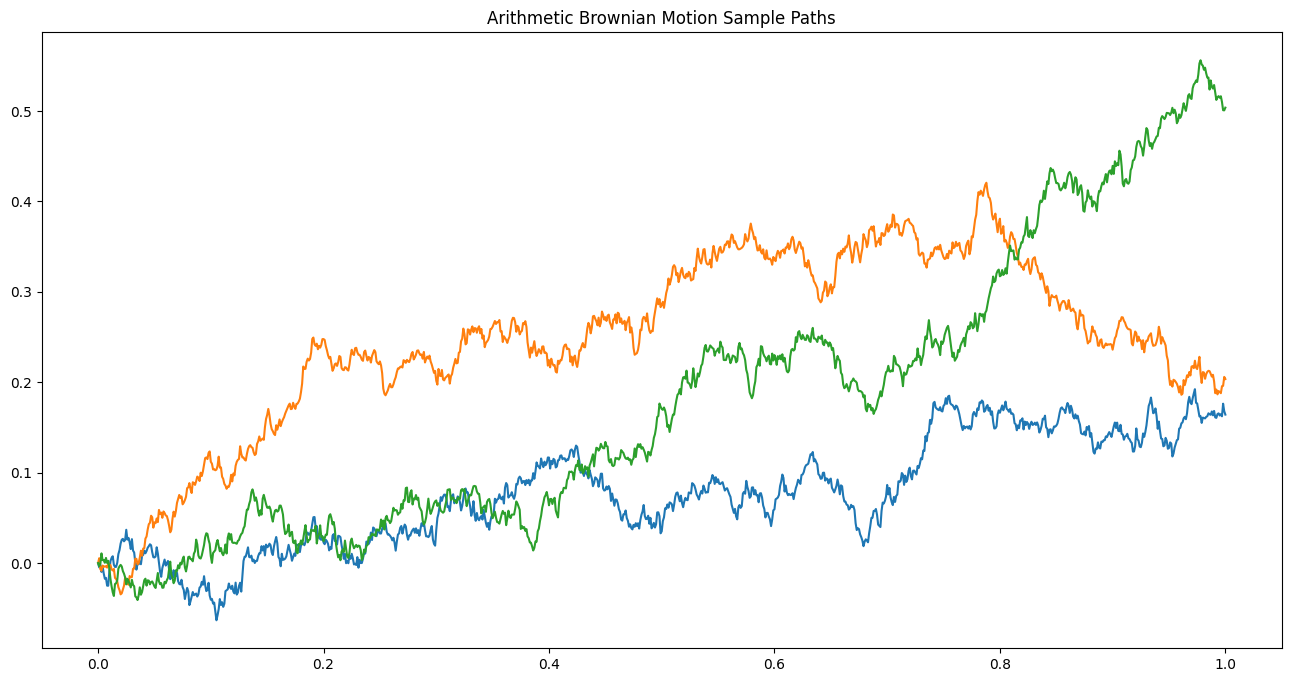

In [6]:
import numpy as np
from matplotlib import pyplot as plt

n = 1000
T = 1
steps = 1000
dt = T/steps

simulation = np.zeros((n, steps+1))

mu = 0.07
sigma = 0.2

for i in range(steps):
    simulation[:, i+1] = simulation[:, i] + mu*dt + sigma*np.random.normal(0, np.sqrt(dt), n)

xaxis = np.arange(start=0, stop=T+dt, step=dt)
plt.figure(figsize=(16,8))
plt.title("Arithmetic Brownian Motion Sample Paths")
plt.plot(xaxis, simulation[0,:])
plt.plot(xaxis, simulation[1,:])
plt.plot(xaxis, simulation[2,:])

print("The expected mean is {}, and the actual mean is {}".format(mu*T, simulation[:,-1].mean()))
print("The expected variance is {}, and the actual variance is {}".format(sigma**2 * T, simulation[:,-1].var()))

### Notes

Arithmetic Brownian Motion is not a good model for stock prices because values can be negative. A better model for stock proces is Geometric Brownian Motion. 

## Geometric Brownian Motion

Geometric Brownian Motion is described by the following SDE:

$$ \dfrac{dX(t)}{X(t)} = \mu dt + \sigma dB(t) $$

This can be solved analytically by applying Ito's Formula to $\ln(X(t))$. This will lead to the following:

$$ X(t) = X(0)e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma B(t)} $$

### Distribution

X(t) follows a lognormal distribution.

### Simulations

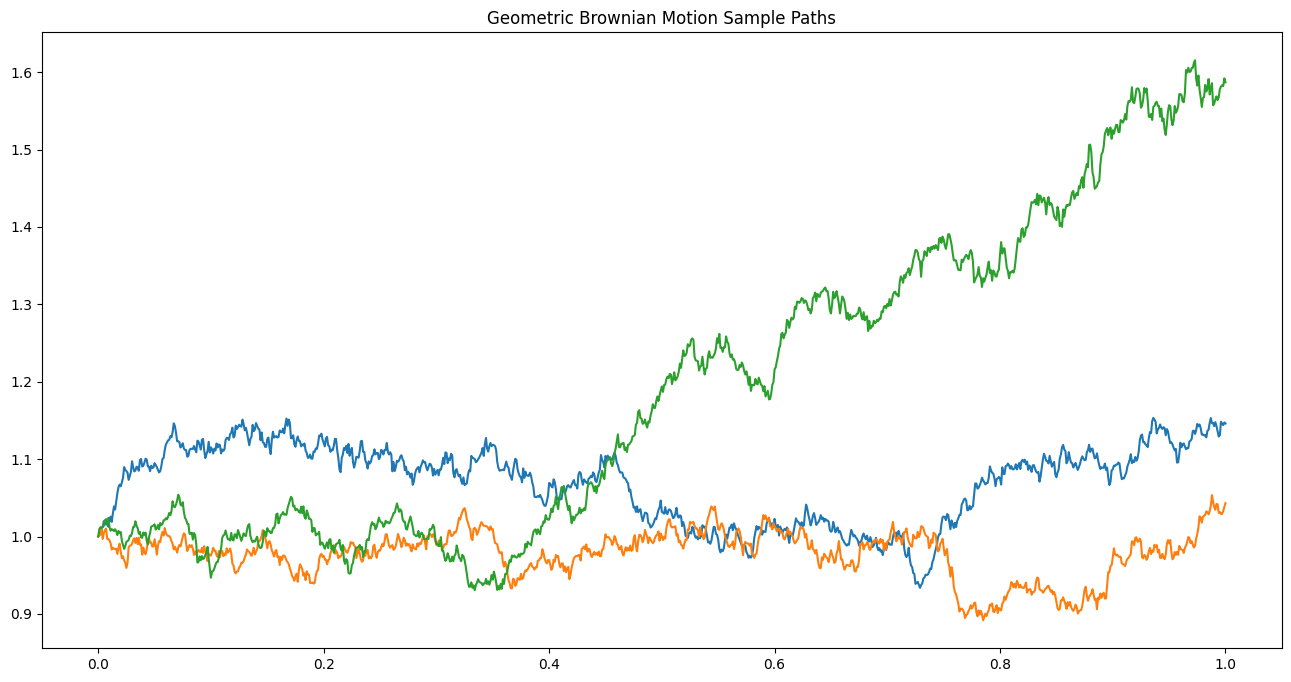

In [10]:
n = 1000
T = 1
steps = 1000
dt = T/steps

simulation = np.ones((n, steps+1))

mu = 0.07
sigma = 0.2

for i in range(steps):
    simulation[:, i+1] = simulation[:, i] + mu*simulation[:, i]*dt + sigma*simulation[:, i]*np.random.normal(0, np.sqrt(dt), n)

xaxis = np.arange(start=0, stop=T+dt, step=dt)
plt.figure(figsize=(16,8))
plt.title("Geometric Brownian Motion Sample Paths")
plt.plot(xaxis, simulation[0,:])
plt.plot(xaxis, simulation[1,:])
plt.plot(xaxis, simulation[2,:])

## Ornstein-Uhlenbeck SDE

The Ornstein-Uhlenbeck SDE is described as follows:

$$ dX(t) = -\lambda X(t) dt + \sigma dB(t) $$

### Simulations

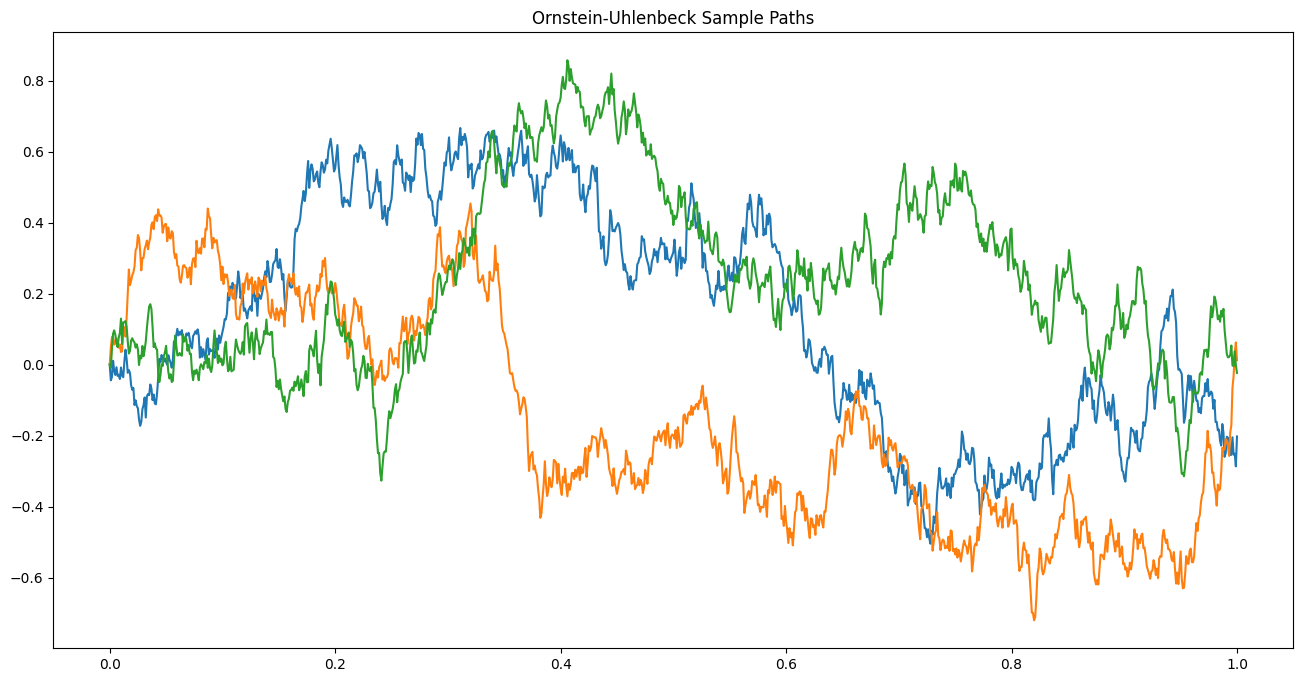

In [19]:
n = 1000
T = 1
steps = 1000
dt = T/steps

simulation = np.zeros((n, steps+1))

lambd = 1
sigma = 1

for i in range(steps):
    simulation[:, i+1] = simulation[:, i] - lambd*simulation[:, i]*dt + sigma*np.random.normal(0, np.sqrt(dt), n)

xaxis = np.arange(start=0, stop=T+dt, step=dt)
plt.figure(figsize=(16,8))
plt.title("Ornstein-Uhlenbeck Sample Paths")
plt.plot(xaxis, simulation[0,:])
plt.plot(xaxis, simulation[1,:])
plt.plot(xaxis, simulation[2,:])

## Mean-Reversion SDE

We will use r(t) as our stochastic process because the means-reversion SDE is used extensively to model interest rates. The Mean-Reversion SDE is given as follows:

$$ dr(t) = -\lambda[r(t) - \bar{r}]dt + \sigma dB(t) $$

where $\bar{r}$ represents the long term mean.

### Simulations

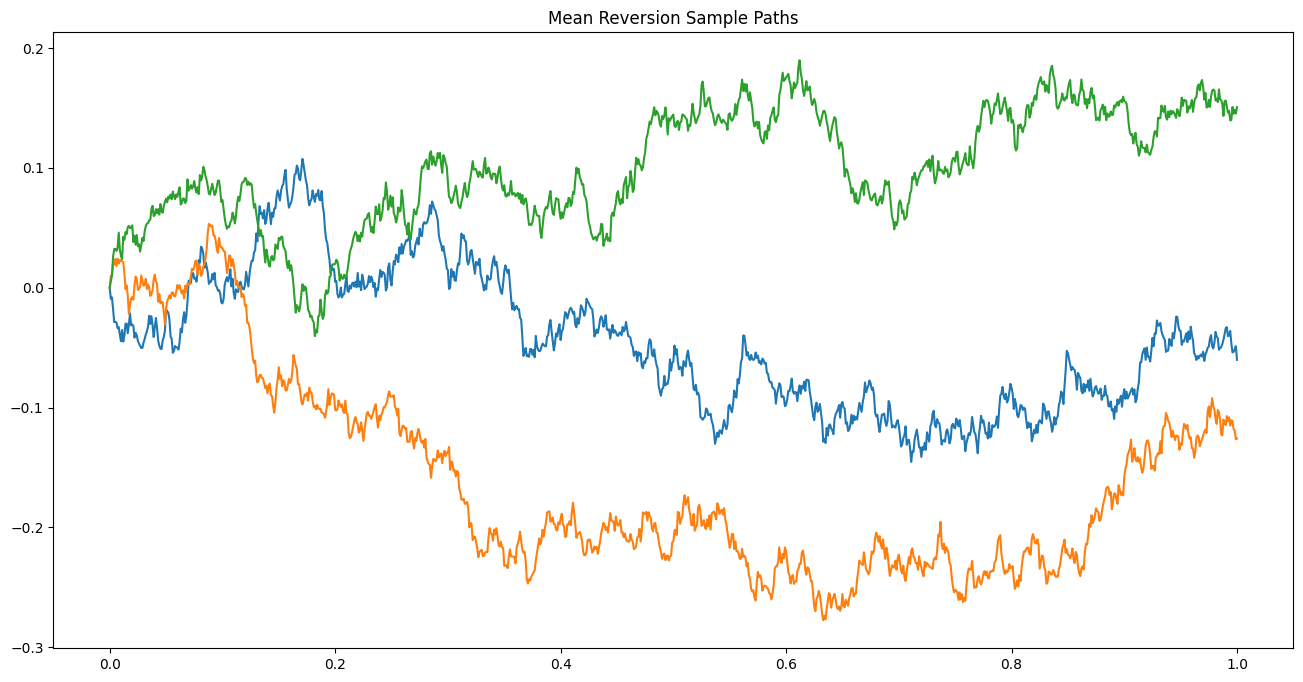

In [22]:
n = 1000
T = 1
steps = 1000
dt = T/steps

simulation = np.zeros((n, steps+1))

lambd = 1
sigma = 0.2
r_bar = 0.05

for i in range(steps):
    simulation[:, i+1] = simulation[:, i] - lambd*(simulation[:, i] - r_bar)*dt + sigma*np.random.normal(0, np.sqrt(dt), n)

xaxis = np.arange(start=0, stop=T+dt, step=dt)
plt.figure(figsize=(16,8))
plt.title("Mean Reversion Sample Paths")
plt.plot(xaxis, simulation[0,:])
plt.plot(xaxis, simulation[1,:])
plt.plot(xaxis, simulation[2,:])

## Mean-Reversion with Square-Root Diffusion SDE

We will use r(t) as our stochastic process because the means-reversion SDE is used extensively to model interest rates. The Mean-Reversion SDE is given as follows:

$$ dr(t) = -\lambda[r(t) - \bar{r}]dt + \sigma \sqrt{r(t)} dB(t) $$

where $\bar{r}$ represents the long term mean.

### Simulations

/tmp/ipykernel_36652/462766048.py:13: RuntimeWarning: invalid value encountered in sqrt
  simulation[:, i+1] = simulation[:, i] - lambd*(simulation[:, i] - r_bar)*dt + sigma*np.sqrt(simulation[:, i])*np.random.normal(0, np.sqrt(dt), n)


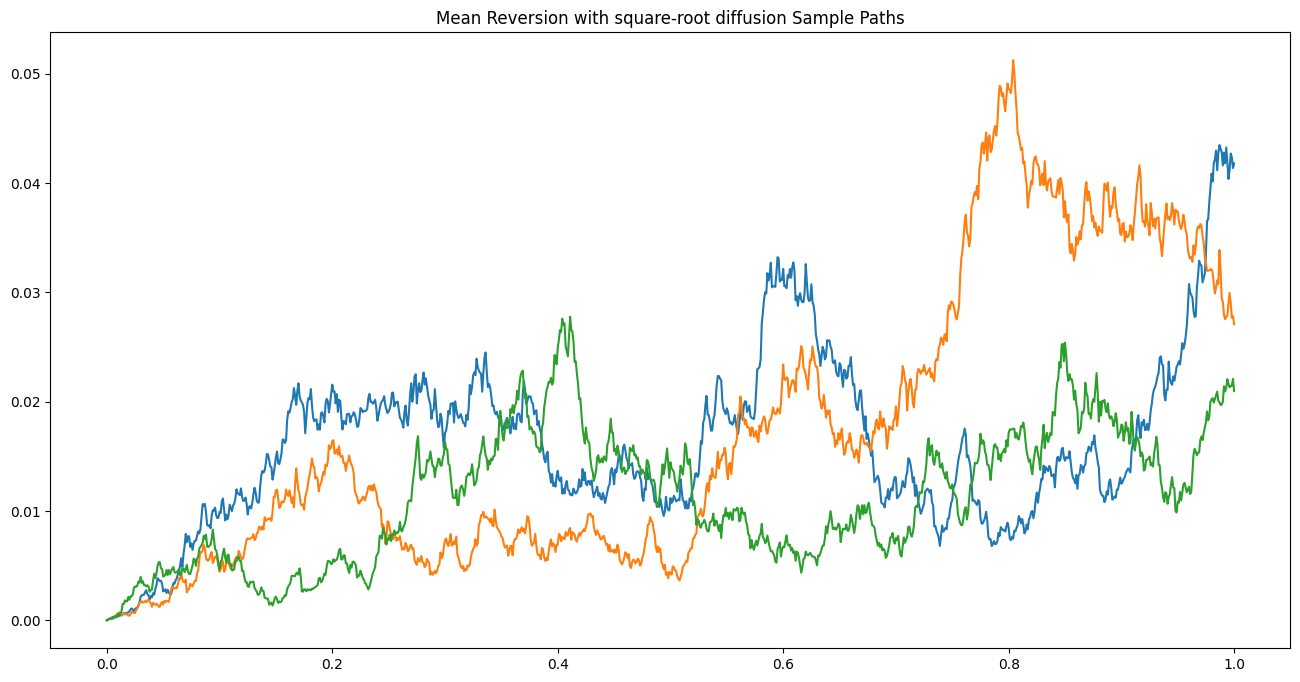

In [25]:
n = 1000
T = 1
steps = 1000
dt = T/steps

simulation = np.zeros((n, steps+1))

lambd = 1
sigma = 0.2
r_bar = 0.05

for i in range(steps):
    simulation[:, i+1] = simulation[:, i] - lambd*(simulation[:, i] - r_bar)*dt + sigma*np.sqrt(simulation[:, i])*np.random.normal(0, np.sqrt(dt), n)

xaxis = np.arange(start=0, stop=T+dt, step=dt)
plt.figure(figsize=(16,8))
plt.title("Mean Reversion with square-root diffusion Sample Paths")
plt.plot(xaxis, simulation[0,:])
plt.plot(xaxis, simulation[1,:])
plt.plot(xaxis, simulation[2,:])

## Coupled SDE's (Non-constant volatility)

In these models, we assume that volatility follows a stochastic process aswell. Observe the following:

$$\dfrac{dS(t)}{S(t)} = \mu (t) dt + \sqrt{\nu (t)}dB_1 (t)$$
$$ d\nu (t) = -\alpha[\nu (t) - \bar{\nu}]dt + \beta \sqrt{\nu (t)} dB_2(t) $$